<a href="https://colab.research.google.com/github/Hk-1224/harini/blob/main/Tree_removal_detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
!pip install rasterio
!pip install geopandas
!pip install Xgboost

In [ ]:
import rasterio
from rasterio.plot import show
import xgboost as xgb
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import geopandas as gpd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_img='/content/drive/MyDrive/googledataset/oldhyderabad.tif'

In [ ]:
src= rasterio.open(path_img)

In [ ]:
img = src.read()

In [ ]:
img

array([[[0.067 , 0.0681, 0.0681, ..., 0.0581, 0.0581, 0.0581],
        [0.067 , 0.0681, 0.0681, ..., 0.0581, 0.0581, 0.0581],
        [0.067 , 0.0681, 0.0681, ..., 0.0581, 0.0581, 0.0581],
        ...,
        [0.0644, 0.0644, 0.0644, ..., 0.0465, 0.0465, 0.0549],
        [0.0745, 0.0745, 0.0745, ..., 0.0465, 0.0465, 0.0549],
        [0.0745, 0.0745, 0.0745, ..., 0.0465, 0.0465, 0.0549]],

       [[0.096 , 0.097 , 0.0861, ..., 0.0748, 0.075 , 0.071 ],
        [0.0934, 0.0973, 0.09  , ..., 0.0748, 0.0749, 0.0784],
        [0.0934, 0.087 , 0.0916, ..., 0.0762, 0.0827, 0.0828],
        ...,
        [0.085 , 0.0832, 0.0832, ..., 0.0764, 0.0774, 0.0794],
        [0.0744, 0.0665, 0.0665, ..., 0.0735, 0.0714, 0.0704],
        [0.0688, 0.0688, 0.0738, ..., 0.0744, 0.0758, 0.0716]],

       [[0.1368, 0.132 , 0.128 , ..., 0.1172, 0.112 , 0.11  ],
        [0.1416, 0.1462, 0.131 , ..., 0.1172, 0.1152, 0.1136],
        [0.1356, 0.1426, 0.1378, ..., 0.1174, 0.123 , 0.1222],
        ...,
        [0.1

In [ ]:
img.shape

(12, 4553, 6697)

In [ ]:
img=img.transpose(1,2,0)

In [ ]:
red = img[:,:,3]
green=img[:,:,2]
blue=img[:,:,1]

In [ ]:
rgb=np.dstack((red,green,blue))

In [ ]:
samples=gpd.read_file('/content/drive/MyDrive/googledataset/oldhyd1point.shp')

In [ ]:
samples

Class  oldhyd_lul  oldhyd_l_1  oldhyd_l_2  oldhyd_l_3  oldhyd_l_4  \
0        1      0.0469      0.0533      0.0664      0.0545      0.0774   
1        1      0.0469      0.0533      0.0664      0.0545      0.0774   
2        1      0.0469      0.0533      0.0664      0.0545      0.0774   
3        1      0.0469      0.0533      0.0664      0.0545      0.0774   
4        1      0.0469      0.0533      0.0664      0.0545      0.0774   
..     ...         ...         ...         ...         ...         ...   
327      4      0.0462      0.0672      0.0964      0.1485      0.1807   
328      4      0.0462      0.0672      0.0964      0.1485      0.1807   
329      4      0.0462      0.0672      0.0964      0.1485      0.1807   
330      4      0.0462      0.0672      0.0964      0.1485      0.1807   
331      4      0.0462      0.0672      0.0964      0.1485      0.1807   

     oldhyd_l_5  oldhyd_l_6  oldhyd_l_7  oldhyd_l_8  oldhyd_l_9  oldhyd_l10  \
0        0.0500      0.0458      0.0406      0.0344      0.0247      0.0171   
1        0.0500      0.0458      0.0406      0.0344      0.0247      0.0171   
2        0.0500      0.0458      0.0406      0.0344      0.0247      0.0171   
3        0.0500      0.0458      0.0406      0.0344      0.0247      0.0171   
4        0.0500      0.0458      0.0406      0.0344      0.0247      0.0171   
..          ...         ...         ...         ...         ...         ...   
327      0.2035      0.2176      0.2301      0.2564      0.2826      0.3403   
328      0.2035      0.2176      0.2301      0.2564      0.2826      0.3403   
329      0.2035      0.2176      0.2301      0.2564      0.2826      0.3403   
330      0.2035      0.2176      0.2301      0.2564      0.2826      0.3403   
331      0.2035      0.2176      0.2301      0.2564      0.2826      0.3403   

     oldhyd_l11  oldhyd_l12 oldhyd_l13 oldhyd_l14                   geometry  
0        0.0125           1       test      water  POINT (78.27112 17.39501)  
1        0.0125           1       test      water  POINT (78.26837 17.39108)  
2        0.0125           1       test      water    POINT (78.267 17.38977)  
3        0.0125           1       test      water  POINT (78.27386 17.38715)  
4        0.0125           1       test      water  POINT (78.27798 17.38453)  
..          ...         ...        ...        ...                        ...  
327      0.2389           4       test   bareland  POINT (78.32447 17.24072)  
328      0.2389           4       test   bareland  POINT (78.32241 17.29941)  
329      0.2389           4       test   bareland  POINT (78.26096 17.35447)  
330      0.2389           4       test   bareland   POINT (78.2613 17.34759)  
331      0.2389           4       test   bareland  POINT (78.61012 17.33448)  

[332 rows x 17 columns]

In [ ]:
samples=samples.to_crs('EPSG:4326')

In [ ]:
print(src.crs)

EPSG:4326


In [ ]:
cmap=ListedColormap(['yellow','red','green','blue'])

<Axes: >

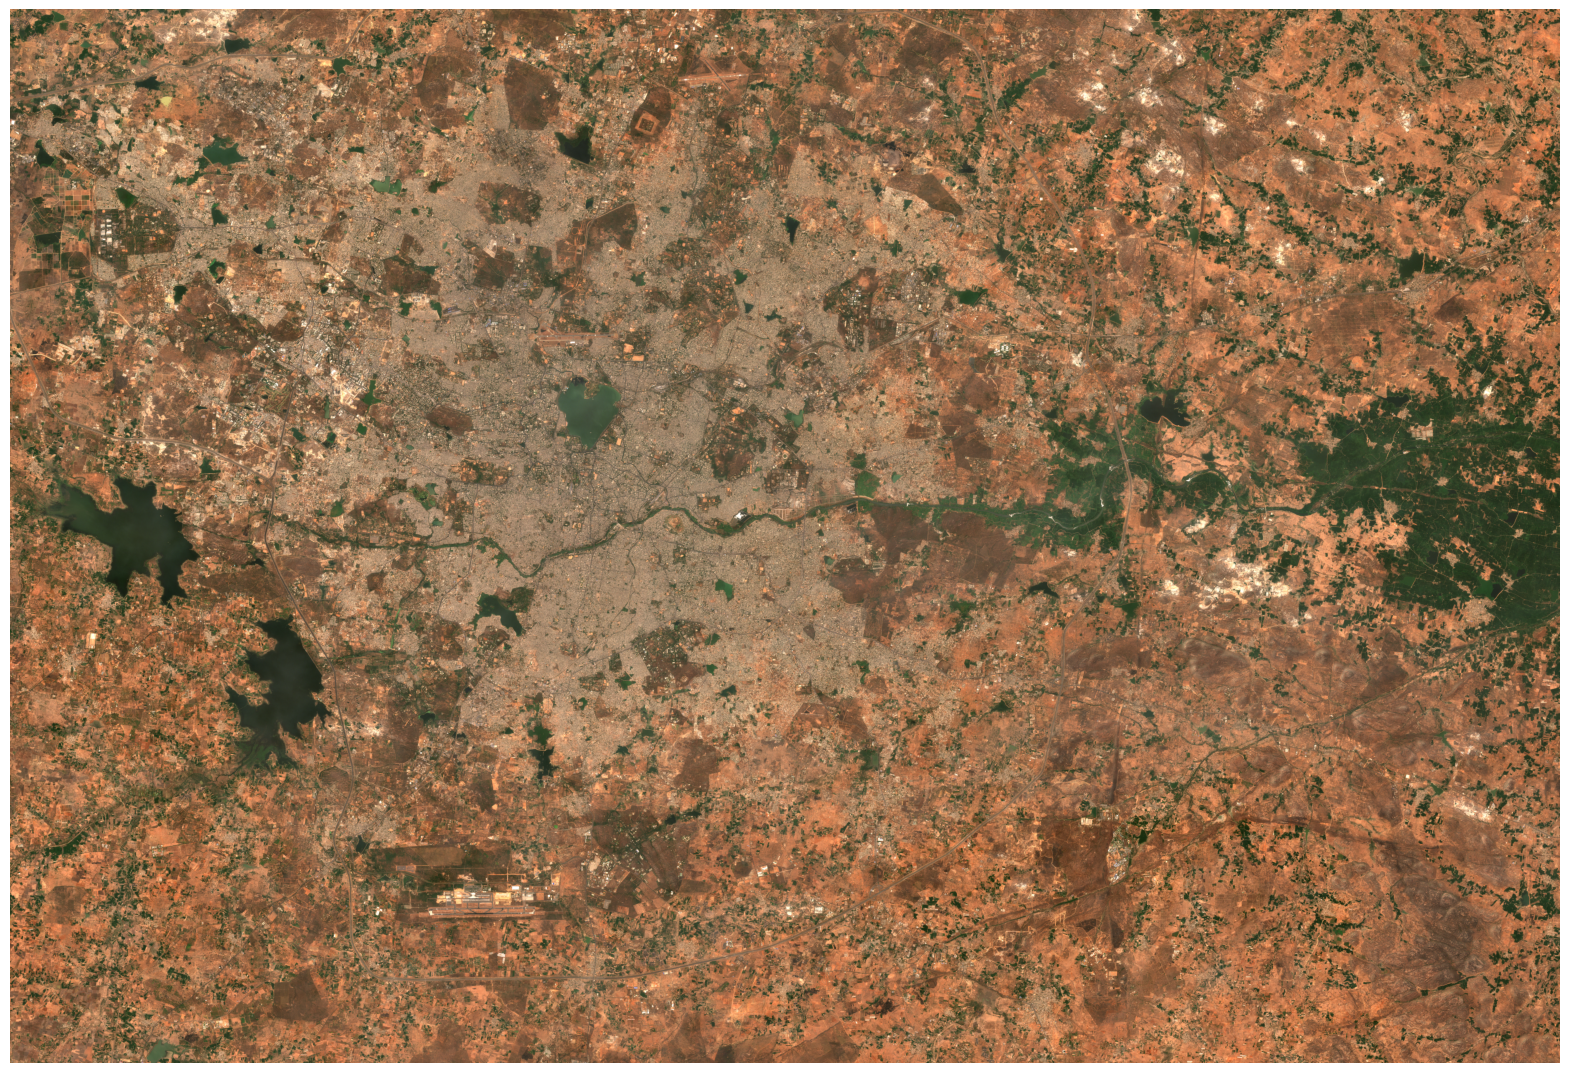

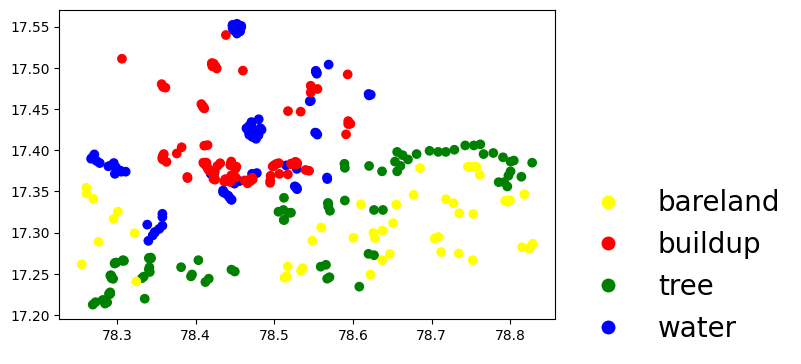

In [ ]:
cmap=ListedColormap(['yellow','red','green','blue'])
fig,ax=plt.subplots(figsize=(20,20))
samples.plot(column='oldhyd_l14',categorical=True,cmap=cmap,legend=True,legend_kwds={'bbox_to_anchor':(1,0.5),'loc':'upper left','fontsize':20,'frameon':False})
ax.axis('off')
show(rgb.transpose([2,0,1])*4,transform=src.transform,ax=ax)

In [ ]:
samples['geometry']

0      POINT (78.27112 17.39501)
1      POINT (78.26837 17.39108)
2        POINT (78.267 17.38977)
3      POINT (78.27386 17.38715)
4      POINT (78.27798 17.38453)
                 ...            
327    POINT (78.32447 17.24072)
328    POINT (78.32241 17.29941)
329    POINT (78.26096 17.35447)
330     POINT (78.2613 17.34759)
331    POINT (78.61012 17.33448)
Name: geometry, Length: 332, dtype: geometry

In [ ]:
import numpy as np
from concurrent.futures import ThreadPoolExecutor

# Read all bands at once
all_bands_data = src.read()  # Shape: (bands, height, width)

def get_band_values(point):
    x = point.xy[0][0]
    y = point.xy[1][0]
    row, col = src.index(x, y)  # Get row and column for the given point

    # Ensure row and col are integers
    row, col = int(row), int(col)

    # Initialize band_value list
    if 0 <= row < all_bands_data.shape[1] and 0 <= col < all_bands_data.shape[2]:
        # Collect values for all bands at once
        band_value = all_bands_data[:, row, col].tolist()  # Returns values for all bands
    else:
        print(f"Warning: row {row} or col {col} out of bounds. Using NaN for all bands.")
        band_value = [float('nan')] * src.count  # Assign NaN for all bands

    return band_value

array_samples = []

# Using ThreadPoolExecutor for parallel processing
with ThreadPoolExecutor() as executor:
    # Submit tasks to the executor
    future_to_point = {executor.submit(get_band_values, point): point for point in samples['geometry']}

    # Collect results as they complete
    for future in future_to_point:
        band_values = future.result()  # This will block until the result is available
        array_samples.append(band_values)

# Optionally, print the resulting samples
print(array_samples)


In [ ]:
X=np.array(array_samples)

In [ ]:
X.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
samples['oldhyd_l14']

In [ ]:
Y=samples['oldhyd_l14'].values

In [ ]:
labelencoder=LabelEncoder()
Y=labelencoder.fit_transform(Y)

In [ ]:
Y

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
clf=xgb.XGBClassifier(objective='multi:softprob',random_state=42,verbosity=3,n_estimators=500,max_depth=10,nthread=8,n_jobs=8,learning_rate=0.01)

In [ ]:
clf.fit(x_train,y_train)

In [ ]:
print("Accuracy on traning set:{:.2f}".format(clf.score(x_train,y_train)))
print("Accuracy on test set:{:.2f}".format(clf.score(x_test,y_test)))

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
c_matrix=confusion_matrix(y_test,y_pred)

In [ ]:
names=['Bareland','Buildup','Vegetation','Waterbody']

In [ ]:
r1=pd.DataFrame(data=c_matrix,index=names,columns=names)
fig,ax=plt.subplots(figsize=(8,8))
ax=sns.heatmap(r1,annot=True,annot_kws={"size":18},fmt='d',cmap='Blues',cbar=False)
ax.tick_params(labelsize=16)
ax.set_yticklabels(names, rotation=45)
ax.set_ylabel('True')
ax.set_xlabel('Predict')

In [ ]:
Predict_img=np.nan_to_num(img)

In [ ]:
Predict_img.shape

In [ ]:
Predict_img=Predict_img.reshape(img.shape[0]*img.shape[1],img.shape[2])

In [ ]:
array_pred=clf.predict(Predict_img)

In [ ]:
array_pred=array_pred.reshape(img.shape[0],img.shape[1])

In [ ]:
plt.figure(figsize=[20,20])
plt.imshow(array_pred,cmap=cmap)
plt.axis('off')

In [ ]:
array_pred

In [ ]:
classes,quantidade=np.unique(array_pred,return_counts=True)

In [ ]:
quantidade

In [ ]:
areas=quantidade*20*20/(10**6)

In [ ]:
nomes=['Bareland','Buildup','Vegetation','Waterbody']
import numpy as np
nomes1=np.array(nomes)

In [ ]:
max_len = max(len(classes), len(quantidade), len(areas), len(nomes1))

# Pad all arrays to the same length
classes = np.pad(classes, (0, max_len - len(classes)), constant_values=np.nan)
quantidade = np.pad(quantidade, (0, max_len - len(quantidade)), constant_values=np.nan)
areas = np.pad(areas, (0, max_len - len(areas)), constant_values=np.nan)
nomes1 = np.pad(nomes, (0, max_len - len(nomes)), constant_values='')

dados_stack=np.stack((classes,quantidade,areas,nomes1))

In [ ]:
print(classes.shape)
print(quantidade.shape)
print(areas.shape)
print(nomes1.shape)

In [ ]:
import numpy as np

# Find the maximum length among all arrays
max_len = max(len(classes), len(quantidade), len(areas), len(nomes1))

# Pad arrays to have the same length
classes = np.pad(classes, (0, max_len - len(classes)), constant_values=np.nan)
quantidade = np.pad(quantidade, (0, max_len - len(quantidade)), constant_values=np.nan)
areas = np.pad(areas, (0, max_len - len(areas)), constant_values=np.nan)
nomes1 = np.pad(nomes1, (0, max_len - len(nomes1)), constant_values='')  # For strings

# Now you can stack them
dados_stack = np.stack((classes, quantidade, areas, nomes1))
print(dados_stack)

In [ ]:
# Find the maximum length
max_len = max(len(classes), len(quantidade), len(areas), len(nomes1))

# Pad arrays to the same length using an integer (e.g., -1)
classes = np.pad(classes, (0, max_len - len(classes)), constant_values=-1)
quantidade = np.pad(quantidade, (0, max_len - len(quantidade)), constant_values=-1)
areas = np.pad(areas, (0, max_len - len(areas)), constant_values=-1)
nomes1 = np.pad(nomes1, (0, max_len - len(nomes1)), constant_values='')  # For string padding

# Now stack them
dados_stack = np.stack((classes, quantidade, areas, nomes1))
print(dados_stack)

In [ ]:
dados_stack

In [ ]:
df_dados=pd.DataFrame(data=dados_stack.T,columns=['Codigos','Qtd','Area km^2','Classes'])

In [ ]:
df_dados['Area km^2']=df_dados['Area km^2'].astype(np.float64)

In [ ]:
df_dados

In [ ]:
fig, ax1=plt.subplots(figsize=(12,6))
ax1=sns.barplot(x='Classes',y='Area km^2',data=df_dados,palette=cmap.colors)

In [ ]:
percent=quantidade*100/quantidade.sum()

In [ ]:
percent